<a href="https://colab.research.google.com/github/sibu991/sibu991/blob/main/CREDIT_CARD_FRAUD_DETECTION_ADV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler


Step 2: Load Dataset

In [5]:
# Load the dataset (download from: https://www.kaggle.com/mlg-ulb/creditcardfraud)
df = pd.read_csv('/content/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Step 3: Understand the Dataset

Shape: (67434, 31)
Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Class distribution:
 Class
0.0    67264
1.0      169
Name: count, dtype: int64


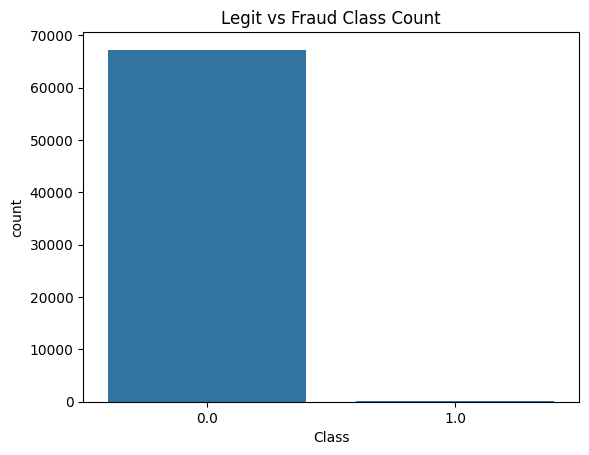

In [6]:
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Class distribution:\n", df['Class'].value_counts())

# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title("Legit vs Fraud Class Count")
plt.show()


Step 4: Handle Class Imbalance

In [8]:
# Drop rows with missing values in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("Balanced class distribution:\n", pd.Series(y_res).value_counts())

Balanced class distribution:
 Class
0.0    169
1.0    169
Name: count, dtype: int64


Step 5: Train/Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


Step 6: Feature Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 7: Train a Classifier

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

Step 8: Evaluate the Model

In [12]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[37  1]
 [ 4 26]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        38
         1.0       0.96      0.87      0.91        30

    accuracy                           0.93        68
   macro avg       0.93      0.92      0.92        68
weighted avg       0.93      0.93      0.93        68



In [40]:
metrics(y_test, y_pred)

Accuracy: 0.95588
Precision: 0.96552
Recall: 0.93333
F1-score: 0.94915


Visualize Confusion Matrix

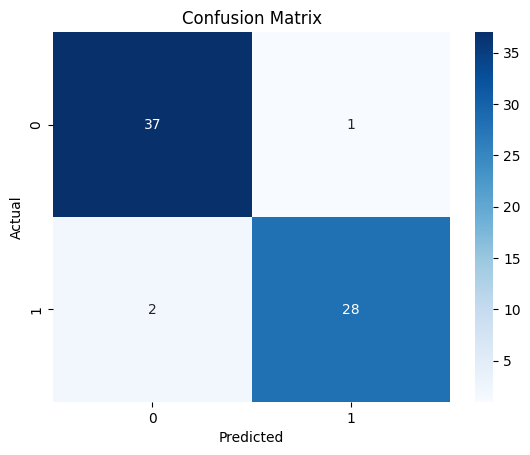

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Credit Card Fraud Detection model using Deep Learning with Keras + TensorFlow

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Step 9: Build the Deep Learning Model

In [43]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

Step 10: Train the Model

In [44]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5322 - loss: 1.0014 - val_accuracy: 0.8088 - val_loss: 0.6422
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6049 - loss: 0.7764 - val_accuracy: 0.8088 - val_loss: 0.5776
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6302 - loss: 0.7420 - val_accuracy: 0.8235 - val_loss: 0.5252
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6773 - loss: 0.6497 - val_accuracy: 0.8529 - val_loss: 0.4860
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6787 - loss: 0.5877 - val_accuracy: 0.8824 - val_loss: 0.4556
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7395 - loss: 0.5195 - val_accuracy: 0.9118 - val_loss: 0.4322
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7789 - loss: 0.4752 - val_accuracy: 0.9118 - val_loss: 0.4126
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7672 - loss: 0.5197 - val_accuracy: 0.9265 - val_loss: 0.3946


Step 11: Evaluate the Model

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9393 - loss: 0.2724
Test Accuracy: 0.9412


Step 12: Predictions and Metrics

In [46]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Confusion Matrix:
[[38  0]
 [ 4 26]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        38
         1.0       1.00      0.87      0.93        30

    accuracy                           0.94        68
   macro avg       0.95      0.93      0.94        68
weighted avg       0.95      0.94      0.94        68



In [47]:
metrics(y_test, y_pred)

Accuracy: 0.94118
Precision: 1.00000
Recall: 0.86667
F1-score: 0.92857


Step 13: Accuracy and Loss Plots

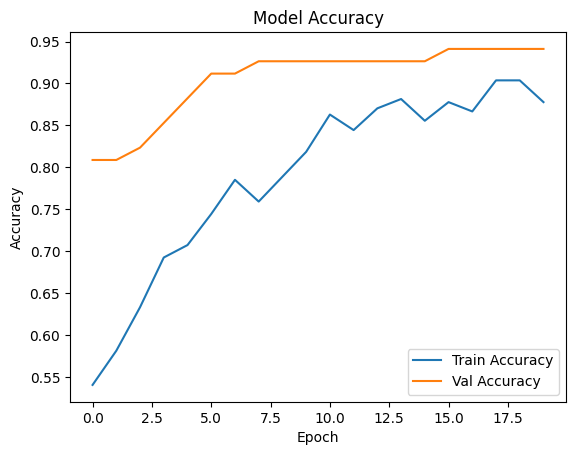

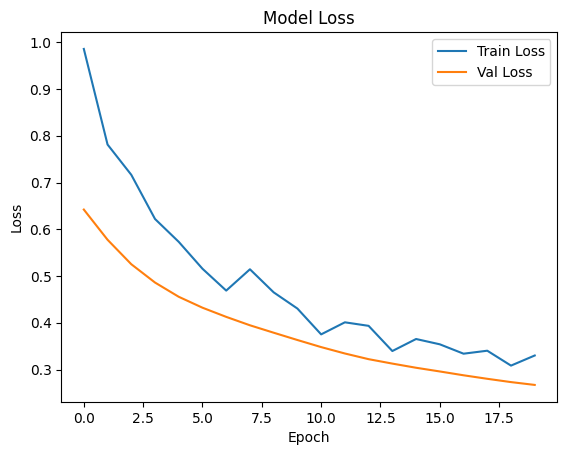

In [48]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Credit Card Fraud Detection using XGBoost

Step 14: Train XGBoost Classifier

In [49]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Step 15: Predict and Evaluate

In [51]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[37  1]
 [ 2 28]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        38
         1.0       0.97      0.93      0.95        30

    accuracy                           0.96        68
   macro avg       0.96      0.95      0.96        68
weighted avg       0.96      0.96      0.96        68



In [52]:
metrics(y_test, y_pred)

Accuracy: 0.95588
Precision: 0.96552
Recall: 0.93333
F1-score: 0.94915


Step 16: Feature Importance

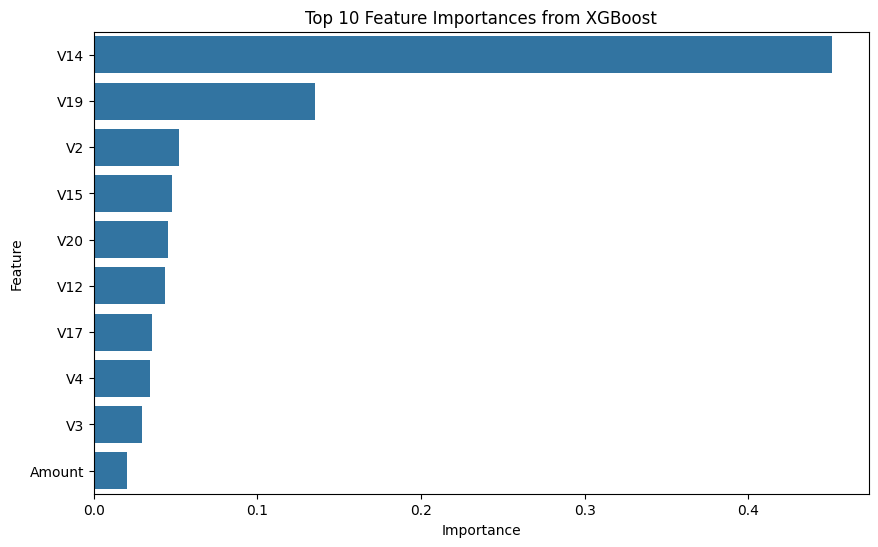

In [53]:
importances = model.feature_importances_
features = df.drop('Class', axis=1).columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances from XGBoost')
plt.show()


Summary:
Highly accurate even without deep networks

# Credit Card Fraud Detection with SMOTE + XGBoost

Step 17: Apply SMOTE

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:\n", pd.Series(y_train_res).value_counts())


Resampled class distribution:
 Class
0.0    139
1.0    139
Name: count, dtype: int64


Step 18: Train XGBoost Model

In [55]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:48:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Step 19: Evaluate the Model

In [56]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[37  1]
 [ 2 28]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        38
         1.0       0.97      0.93      0.95        30

    accuracy                           0.96        68
   macro avg       0.96      0.95      0.96        68
weighted avg       0.96      0.96      0.96        68

ROC-AUC Score: 0.9746


In [57]:
metrics(y_test, y_pred)

Accuracy: 0.95588
Precision: 0.96552
Recall: 0.93333
F1-score: 0.94915


Step 20: Visualize Confusion Matrix

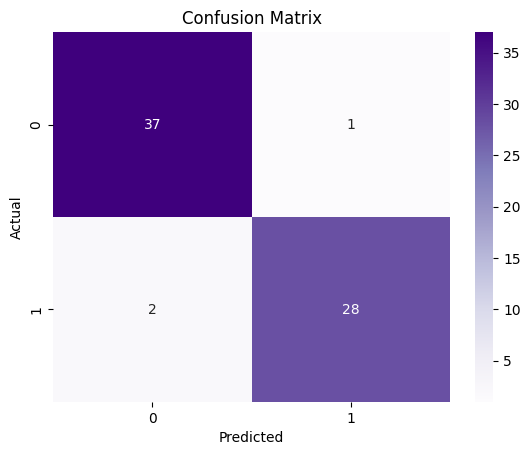

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Summary:
SMOTE generates synthetic samples to balance classes before training.

XGBoost handles high-dimensional and tabular data very efficiently.

ROC-AUC Score helps understand model effectiveness even in imbalanced scenarios.



#Credit Card Fraud Detection with SMOTE + Deep Neural Network (Keras)


Step 21: Standardize and Apply SMOTE

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Balanced class distribution:", pd.Series(y_train_res).value_counts())


Balanced class distribution: Class
0.0    139
1.0    139
Name: count, dtype: int64


Step 22: Build Deep Neural Network

In [60]:
model = Sequential([
    Dense(64, input_shape=(X_train_res.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

Step 23: Train the Model

In [61]:
history = model.fit(
    X_train_res, y_train_res,
    epochs=20,
    batch_size=256,
    validation_data=(X_test_scaled, y_test)
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 415ms/step - accuracy: 0.6036 - loss: 0.6678 - val_accuracy: 0.7794 - val_loss: 0.5816
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6628 - loss: 0.6101 - val_accuracy: 0.8088 - val_loss: 0.5542
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6759 - loss: 0.6347 - val_accuracy: 0.8382 - val_loss: 0.5303
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7007 - loss: 0.5690 - val_accuracy: 0.8529 - val_loss: 0.5075
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7525 - loss: 0.5419 - val_accuracy: 0.8824 - val_loss: 0.4856
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7564 - loss: 0.5133 - val_accuracy: 0.8971 - val_loss: 0.4650
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8006 - loss: 0.4941 - val_accuracy: 0.9118 - val_loss: 0.4455
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7980 - loss: 0.4905 - val_accuracy: 0.9265 - val_loss: 0.427

Step 24: Evaluate Performance

In [62]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Confusion Matrix:
 [[37  1]
 [ 4 26]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        38
         1.0       0.96      0.87      0.91        30

    accuracy                           0.93        68
   macro avg       0.93      0.92      0.92        68
weighted avg       0.93      0.93      0.93        68

ROC-AUC Score: 0.9237


Step 25: Plot Accuracy and Loss

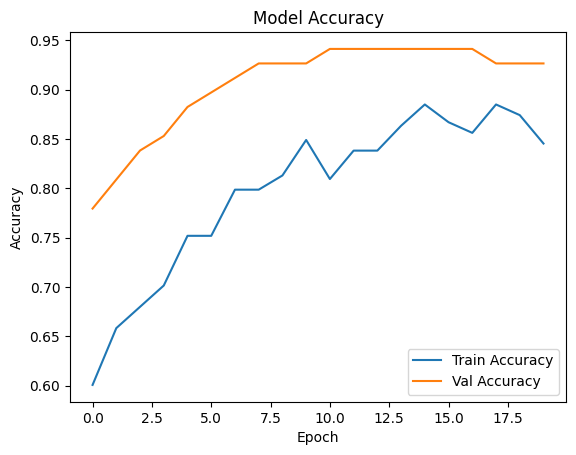

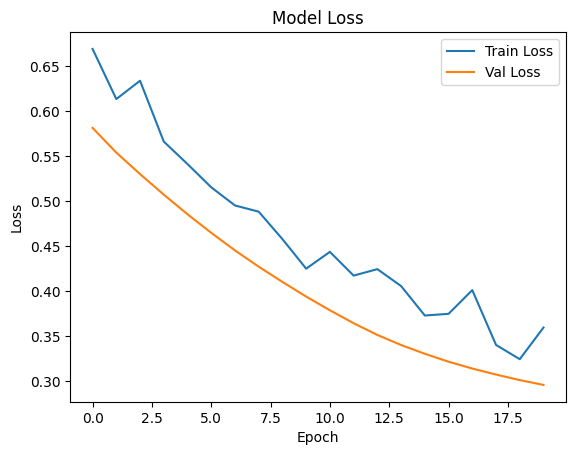

In [63]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [64]:
metrics(y_test, y_pred)

Accuracy: 0.92647
Precision: 0.96296
Recall: 0.86667
F1-score: 0.91228


Summary:
This deep neural network handles imbalanced classes using SMOTE.

You can improve performance using:

More layers/neurons

EarlyStopping, BatchNormalization

Hyperparameter tuning